https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data

Points of interest for analises

1.   Which type of vechicle is the most common, and gets the highest rating from customers. Can we advise our drivers to get that type of vehicle to increase revenue?
2.   Which locations have the most rides and the highest revenue. Can we increase coverage in that area?
3.   Which parts of the day have higher number of rides. Can we create dynamic prices?
4.   Which types of vehicles are more common in long rides? Can we increase fleet of our vehicles?
5.   Can we indentify most common causes for cancelation by customers?
6.   Which payment method has the most revenue and is most common? Can we create special promotions for that method?



In [1]:
import os
os.makedirs("/content/dataset", exist_ok=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/PDS/uber_data_analytics_dashboard_dataset.zip" -d "/content/dataset"

In [2]:
import pandas as pd

df = pd.read_csv("/content/dataset/ncr_ride_bookings.csv")

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.shape

(150000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.hour

0.   Data overview

/tmp/ipython-input-1133251573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Booking Status", data=df, order=df["Booking Status"].value_counts().index, palette="magma")


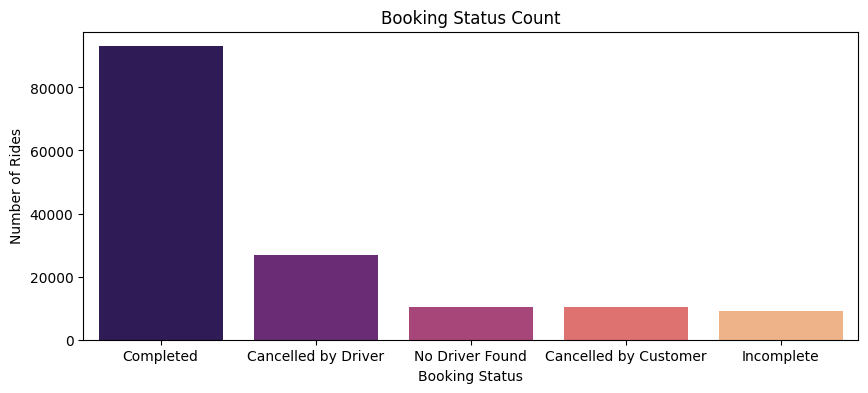

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(x="Booking Status", data=df, order=df["Booking Status"].value_counts().index, palette="magma")
plt.title("Booking Status Count")
plt.ylabel("Number of Rides")
plt.show()



---


1.    Which type of vechicle is the most common, and gets the highest rating from customers? Can we advise our drivers to get that type of vehicle to increase revenue?

/tmp/ipython-input-3085769677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Vehicle Type", data=df, order=df["Vehicle Type"].value_counts().index, palette="viridis")


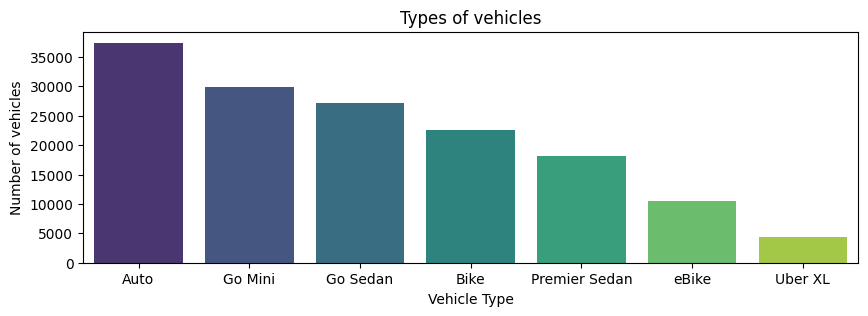

In [11]:
plt.figure(figsize=(10, 3))
sns.countplot(x="Vehicle Type", data=df, order=df["Vehicle Type"].value_counts().index, palette="viridis")
plt.title("Types of vehicles")
plt.ylabel("Number of vehicles")
plt.show()

We can see that the most common type is Auto.

/tmp/ipython-input-420516898.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle Type", y="Avg Rating", data=vehicle_stats, palette="viridis")


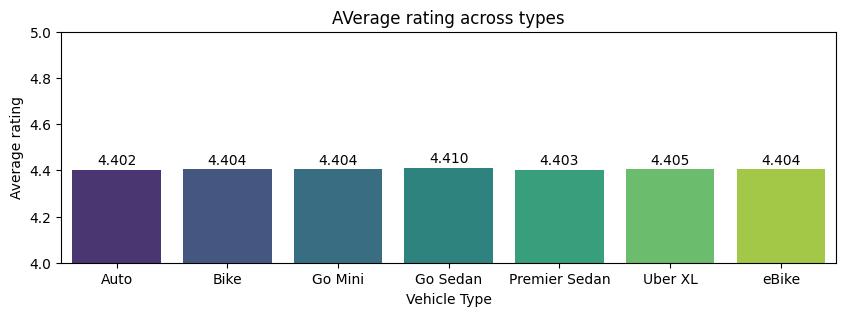

In [12]:
vehicle_stats = df.groupby("Vehicle Type").agg({
    "Customer Rating":"mean",
    "Booking Value":"mean"
}).rename(columns={"Customer Rating":"Avg Rating",
                   "Booking Value":"Avg Revenue"}).reset_index()

plt.figure(figsize=(10, 3))
sns.barplot(x="Vehicle Type", y="Avg Rating", data=vehicle_stats, palette="viridis")
plt.ylim(4.0,5.0)
plt.title("AVerage rating across types")
plt.ylabel("Average rating")
for i, v in enumerate(vehicle_stats["Avg Rating"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center", va="bottom")
plt.show()

Although the Auto is the most common, average rating is almost the same across all types. So here we cannot say that one is better than the other.

/tmp/ipython-input-2103381388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle Type", y="Avg Revenue", data=vehicle_stats, palette="viridis")


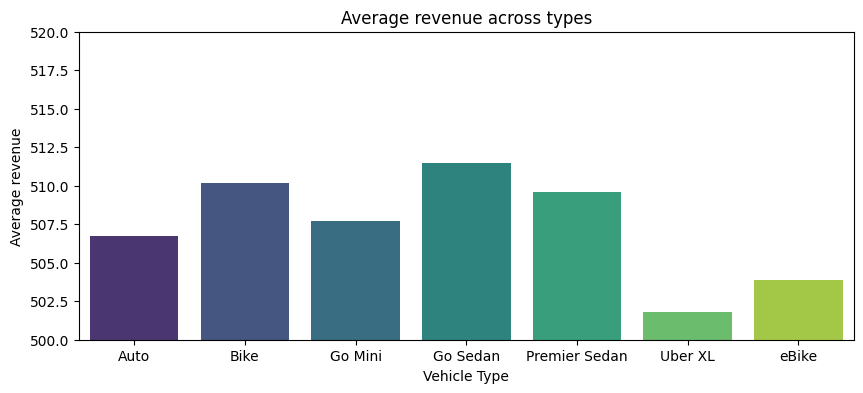

In [13]:
plt.figure(figsize=(10, 4))
sns.barplot(x="Vehicle Type", y="Avg Revenue", data=vehicle_stats, palette="viridis")
plt.ylim(500, 520)
plt.title("Average revenue across types")
plt.ylabel("Average revenue")
plt.show()

Even though that Go Sedans don't have the highest number of vehicles or higher rating, it brings more revenue than other types with Bike and Premier Sedan following close by. Here we can advise our stakeholders to invest into these types of vehicles.




---


2.    Which locations have the most rides and the highest revenue. Can we increase coverage in that area?

/tmp/ipython-input-1439648920.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1439648920.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


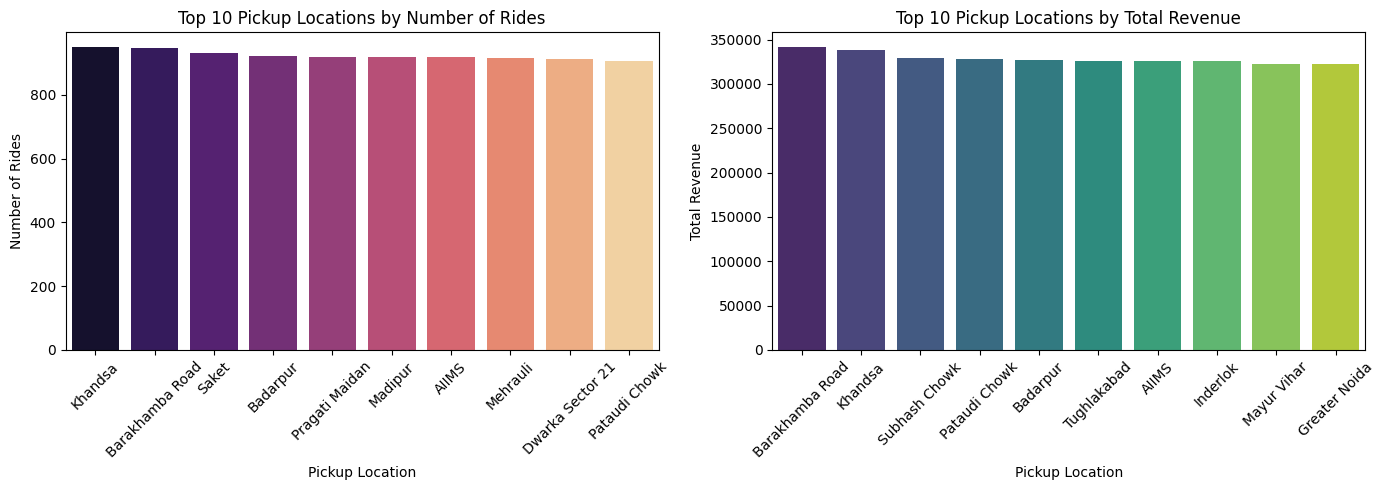

In [14]:
location_stats = df.groupby("Pickup Location").agg({
    "Booking ID": "count",
    "Booking Value": "sum"
}).rename(columns={
    "Booking ID": "Num Rides",
    "Booking Value": "Total Revenue"
}).reset_index()

top_locations_rides = location_stats.sort_values(by="Num Rides", ascending=False).head(10)
top_locations_revenue = location_stats.sort_values(by="Total Revenue", ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data=top_locations_rides,
    x="Pickup Location", y="Num Rides", palette="magma", ax=axes[0]
)
axes[0].set_title("Top 10 Pickup Locations by Number of Rides")
axes[0].set_xlabel("Pickup Location")
axes[0].set_ylabel("Number of Rides")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(
    data=top_locations_revenue,
    x="Pickup Location", y="Total Revenue", palette="viridis", ax=axes[1]
)
axes[1].set_title("Top 10 Pickup Locations by Total Revenue")
axes[1].set_xlabel("Pickup Location")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

On this plot we can see top locations based on number of rides (frequency) and by total revenue. Based on this top 10, we can increase number of vehicles in these areas to have higher availability.




---


3.    Which parts of the day have higher number of rides. Can we create dynamic prices?

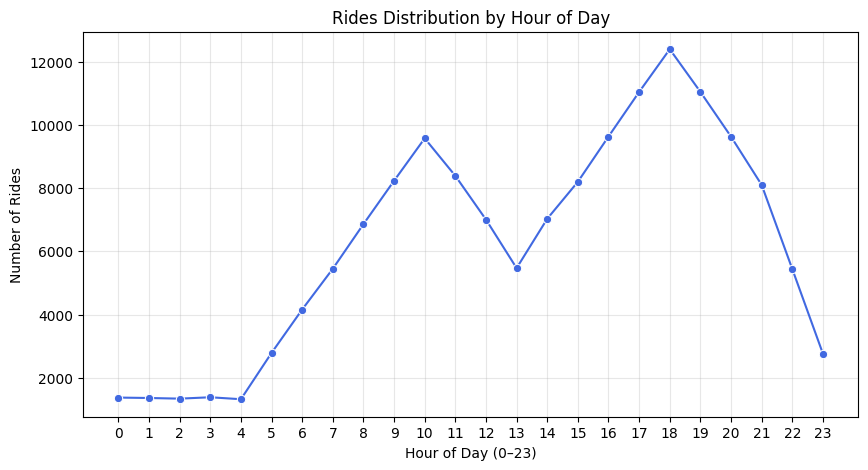

In [ ]:
rides_by_hour = df.groupby("Hour")["Booking ID"].count().reset_index()
rides_by_hour.rename(columns={"Booking ID": "Num Rides"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=rides_by_hour, x="Hour", y="Num Rides", marker="o", color="royalblue")
plt.title("Rides Distribution by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.show()

As expected night have lower number of rides, while we have to peaks, morning peak when people usualy commute to work or school. And the other in the afternoon when people commute back home. Based on this we can change availability of our vehicles or create dynamic prices where we can decrease prices in peak periods to have competitive edge over our competitor companies.

---
4.    Which types of vehicles are more common in long rides? Can we increase fleet of our vehicles?

In [ ]:
df_filtered = df.dropna(subset=["Vehicle Type", "Ride Distance"])
vehicle_distance = df_filtered.groupby("Vehicle Type")["Ride Distance"].mean().reset_index()
vehicle_distance = vehicle_distance.sort_values(by="Ride Distance", ascending=False)
vehicle_distance.rename(columns={"Ride Distance": "Avg Ride Distance"}, inplace=True)

/tmp/ipython-input-18081415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_distance, x="Vehicle Type", y="Avg Ride Distance", palette="magma")


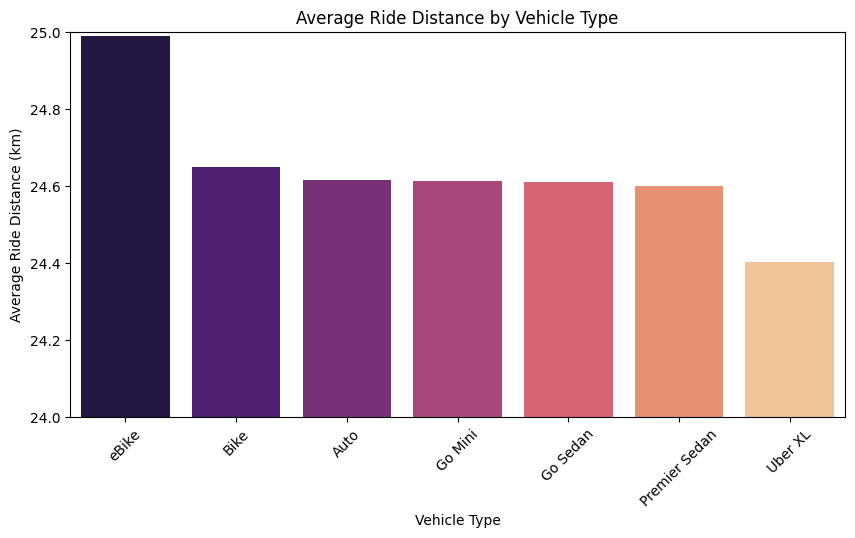

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=vehicle_distance, x="Vehicle Type", y="Avg Ride Distance", palette="magma")
plt.title("Average Ride Distance by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Ride Distance (km)")
plt.xticks(rotation=45)
plt.ylim(24,25)
plt.show()

Here we cannot conclude any useful information, all of the types have similar average distance.

---
5.    Can we indentify most common causes for cancelation by customers and drivers?

In [ ]:
cancelled_by_customer = df[df["Booking Status"] == "Cancelled by Customer"]
cancel_reasons_customer = cancelled_by_customer["Reason for cancelling by Customer"].value_counts().reset_index()

cancelled_by_driver = df[df["Booking Status"] == "Cancelled by Driver"]
cancel_reasons_driver = cancelled_by_driver["Driver Cancellation Reason"].value_counts().reset_index()

/tmp/ipython-input-965965512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-965965512.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


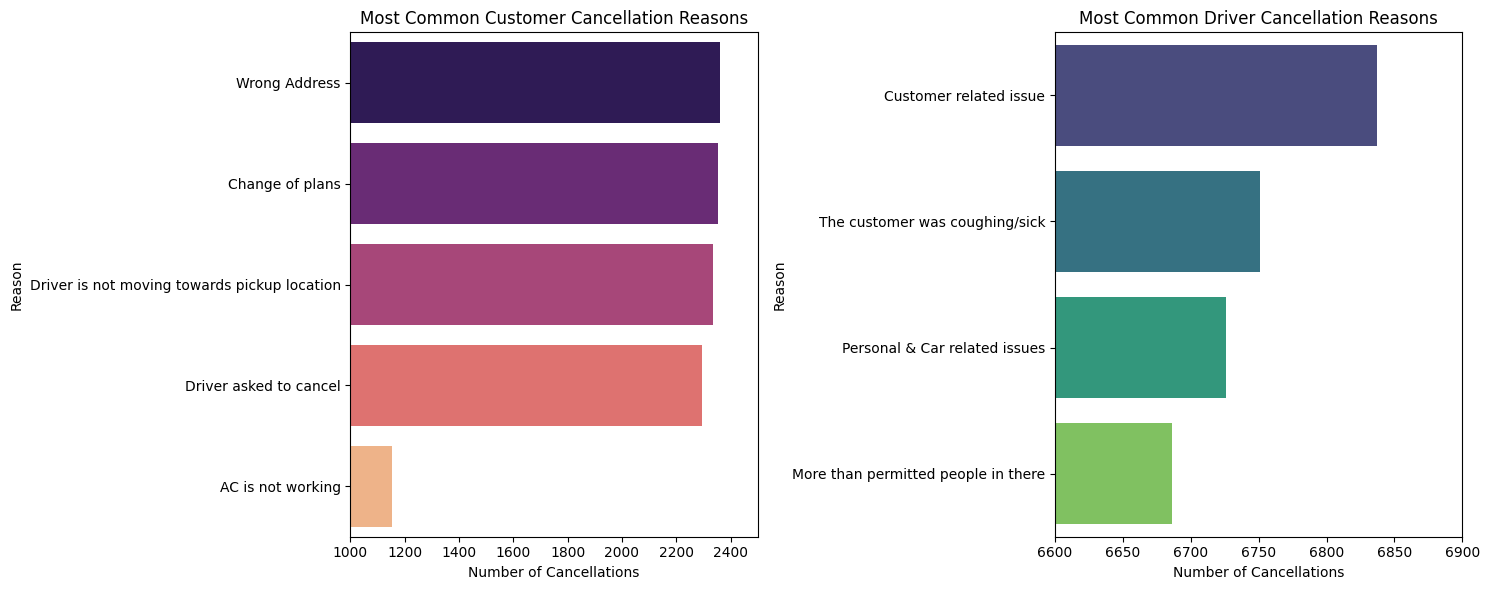

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(
    data=cancel_reasons_customer,
    x="count", y="Reason for cancelling by Customer",
    palette="magma", ax=axes[0]
)
axes[0].set_title("Most Common Customer Cancellation Reasons")
axes[0].set_xlabel("Number of Cancellations")
axes[0].set_ylabel("Reason")
axes[0].set_xlim(1000, 2500)

sns.barplot(
    data=cancel_reasons_driver,
    x="count", y="Driver Cancellation Reason",
    palette="viridis", ax=axes[1]
)
axes[1].set_title("Most Common Driver Cancellation Reasons")
axes[1].set_xlabel("Number of Cancellations")
axes[1].set_ylabel("Reason")
axes[1].set_xlim(6600, 6900)

plt.tight_layout()
plt.show()


Based on these plots we can address critical areas. Better navigation could be a good proposal since 2 of 5 canceling reasons are about adress or not moving vehicles.

---
6.    Which payment method has the most revenue and is most common? Can we create special promotions for that method?

/tmp/ipython-input-1720418498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_method, x="Payment Method", y="Booking Value", palette="magma")


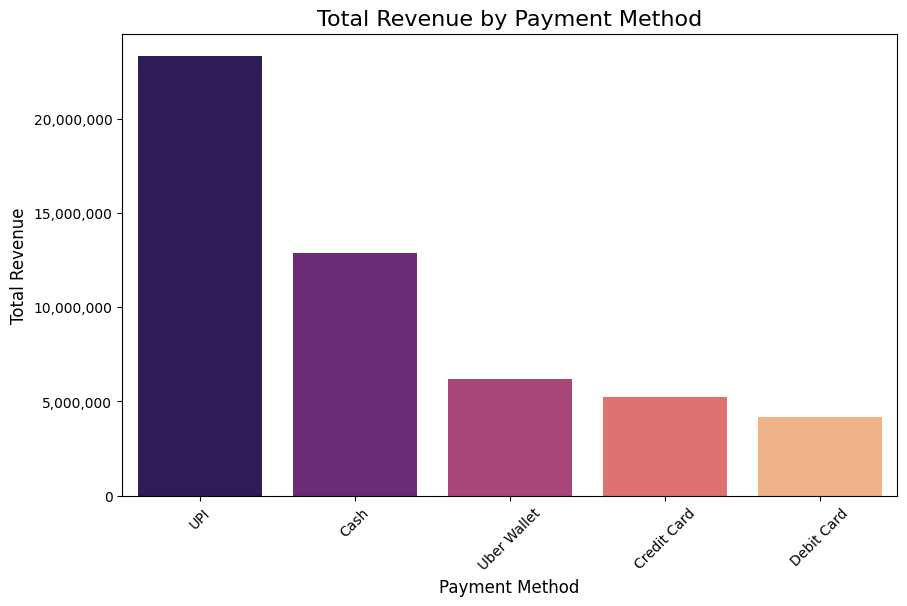

In [ ]:
import matplotlib.ticker as mtick

revenue_by_method = df.groupby("Payment Method")["Booking Value"].sum().reset_index()
revenue_by_method = revenue_by_method.sort_values(by="Booking Value", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=revenue_by_method, x="Payment Method", y="Booking Value", palette="magma")

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.title("Total Revenue by Payment Method", fontsize=16)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Since UPI has the highest revenue out of all types, we can arange special promotions for using that payment method. Cash is also popular, which can be accounted into this.

---
# Predictions

1.    We can do a prediction if the ride is going to be canceled, if the prediction is of high certainty, we can auto-assing a new driver.

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

df_ml = df.copy()

df_ml['Cancelled'] = df_ml['Booking Status'].astype(str).str.contains('cancel', case=False, na=False).astype(int)


In [ ]:
df_ml.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Hour',
       'Cancelled'],
      dtype='object')

In [ ]:
numeric_features = [
    'Booking Value',
    'Ride Distance',
    'Avg VTAT',
    'Avg CTAT',
    'Driver Ratings',
    'Customer Rating',
    'Hour'
]

categorical_features = [
    'Vehicle Type',
    'Pickup Location',
    'Drop Location',
    'Payment Method'
]

features = numeric_features + categorical_features

X = df_ml[features].copy()
y = df_ml['Cancelled'].copy()

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
X_train.shape, X_test.shape

((120000, 11), (30000, 11))

In [ ]:
models = {
    "LogisticRegression": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "RandomForest": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    ]),
    "XGBoost": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1))
    ])
}

In [ ]:
# Cell 6: training and evaluation (accuracy, precision, recall, F1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, pipeline in models.items():
    print(f"\nTraining {name} ...")
    pipeline.fit(X_train, y_train)

    # predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # compute metrics for train & test
    metrics = {
        'model': name,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train, zero_division=0),
        'test_precision': precision_score(y_test, y_pred_test, zero_division=0),
        'train_recall': recall_score(y_train, y_pred_train, zero_division=0),
        'test_recall': recall_score(y_test, y_pred_test, zero_division=0),
        'train_f1': f1_score(y_train, y_pred_train, zero_division=0),
        'test_f1': f1_score(y_test, y_pred_test, zero_division=0)
    }
    results.append(metrics)

    print(f"{name}")
    print(f"  Train - Acc: {metrics['train_accuracy']:.3f} | Prec: {metrics['train_precision']:.3f} | Rec: {metrics['train_recall']:.3f} | F1: {metrics['train_f1']:.3f}")
    print(f"  Test  - Acc: {metrics['test_accuracy']:.3f} | Prec: {metrics['test_precision']:.3f} | Rec: {metrics['test_recall']:.3f} | F1: {metrics['test_f1']:.3f}")
    print("-" * 70)

# summary dataframe
results_df = pd.DataFrame(results).sort_values('test_f1', ascending=False).reset_index(drop=True)
print("\n Summary (sorted by test F1):")
display(results_df)



🔹 Training LogisticRegression ...
LogisticRegression
  Train -> Acc: 0.930 | Prec: 0.782 | Rec: 1.000 | F1: 0.877
  Test  -> Acc: 0.929 | Prec: 0.780 | Rec: 1.000 | F1: 0.876
----------------------------------------------------------------------

🔹 Training RandomForest ...
RandomForest
  Train -> Acc: 1.000 | Prec: 1.000 | Rec: 1.000 | F1: 1.000
  Test  -> Acc: 0.997 | Prec: 1.000 | Rec: 0.990 | F1: 0.995
----------------------------------------------------------------------

🔹 Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:39:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
  Train -> Acc: 0.997 | Prec: 1.000 | Rec: 0.990 | F1: 0.995
  Test  -> Acc: 0.997 | Prec: 1.000 | Rec: 0.990 | F1: 0.995
----------------------------------------------------------------------

 Summary (sorted by test F1):


,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,RandomForest,0.999983,0.997433,1.000000,1.000000,0.999933,0.989733,0.999967,0.994840
1,XGBoost,0.997467,0.997433,1.000000,1.000000,0.989867,0.989733,0.994908,0.994840
2,LogisticRegression,0.930125,0.929500,0.781555,0.780031,1.000000,1.000000,0.877385,0.876424


So we can conclude with the high precision on which ride is going to be canceled. Based on that we can reassing other drivers that have much lower chances of canceling. This can be a part of booking process which could potenticaly increase number of completed rides, and increase revenue.